# Neural Nets - Multiclass, Multilabel Classification - Irrigation System

Rob Rappa
7/7/19

#Source - DataCamp - Deep Learning with Keras

In [57]:
#########################
# IMPORT
#########################

import math
import numpy as np
from numpy import genfromtxt
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint

### Read Data

In [8]:
#Read irrigation data
#Downloaded from Datacamp

#Read input
sensors = pd.read_csv('data_irrigation_sensorsInput.csv', sep=",")

sensors.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,2,1,7,0,1,1,4,0,3,1,3,6,8,1,0,2,1,9,2
1,5,1,3,5,2,2,1,2,3,1,3,2,2,4,5,5,2,2,2,7
2,3,1,4,3,4,0,1,6,0,2,3,2,4,3,3,1,0,3,1,0
3,2,2,4,3,5,0,3,2,2,5,3,1,2,4,1,1,4,1,3,2
4,4,3,3,2,5,1,3,1,1,2,4,5,3,1,3,2,2,1,1,0


In [9]:
#Read output
parcels = pd.read_csv('data_irrigation_parcelsOutput.csv', sep=",")

parcels.head()

,0,1,2
0,0,1,0
1,0,0,0
2,1,1,0
3,0,0,0
4,1,1,0


In [10]:
#Split data
sensors_train, sensors_test, parcels_train, parcels_test = train_test_split(sensors \
                                                    , parcels, test_size=0.33, random_state=42)

### Build Architecture

In [11]:
# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64,input_shape=(20,),activation='relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3,activation='sigmoid'))

# Compile your model with adam and binary crossentropy loss
model.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


In [49]:
#Include Keras Callbacks

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_acc', patience=10)


# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_multiclassmultilabel_model.hdf5', save_best_only=True)

### Train Model

In [50]:
# Train for 100 epochs using a validation split of 0.2
history = model.fit(sensors_train, parcels_train, \
                    validation_data=(sensors_test, parcels_test),\
                    epochs = 100, \
                   callbacks=[monitor_val_acc,modelCheckpoint])


Train on 1340 samples, validate on 660 samples
Epoch 1/100
1340/1340 [==============================] - 0s 64us/step - loss: 0.0600 - acc: 0.9811 - val_loss: 0.4488 - val_acc: 0.8732
Epoch 2/100
1340/1340 [==============================] - 0s 54us/step - loss: 0.0580 - acc: 0.9831 - val_loss: 0.4490 - val_acc: 0.8707
Epoch 3/100
1340/1340 [==============================] - 0s 60us/step - loss: 0.0580 - acc: 0.9813 - val_loss: 0.4547 - val_acc: 0.8768
Epoch 4/100
1340/1340 [==============================] - 0s 66us/step - loss: 0.0572 - acc: 0.9828 - val_loss: 0.4528 - val_acc: 0.8732
Epoch 5/100
1340/1340 [==============================] - 0s 68us/step - loss: 0.0581 - acc: 0.9826 - val_loss: 0.4595 - val_acc: 0.8768
Epoch 6/100
1340/1340 [==============================] - 0s 80us/step - loss: 0.0586 - acc: 0.9813 - val_loss: 0.4598 - val_acc: 0.8768
Epoch 7/100
1340/1340 [==============================] - 0s 78us/step - loss: 0.0569 - acc: 0.9843 - val_loss: 0.4582 - val_acc: 0.8722
E

### Review Training and Validation Loss and Accuracy

In [42]:
#Look at Loss
history.history['loss'][:5]

[0.06609919480423429,
 0.0636237518000069,
 0.06817113263393516,
 0.06380676947422882,
 0.06485369734799684]

In [43]:
#Function for plotting loss over epochs
#Pulled from DataCamp class: print(inspect.getsource(plot_loss))

def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

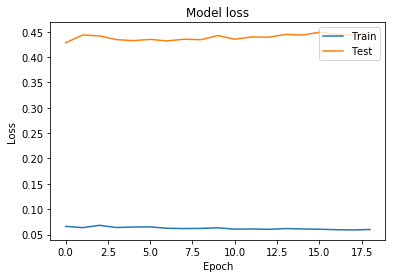

In [44]:
# Plot train vs test loss during training
plot_loss(history.history['loss'], history.history['val_loss'])

In [45]:
#Function for plotting accuracy over epochs
#Pulled from DataCamp class: print(inspect.getsource(plot_accuracy))

def plot_accuracy(acc,val_acc):
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

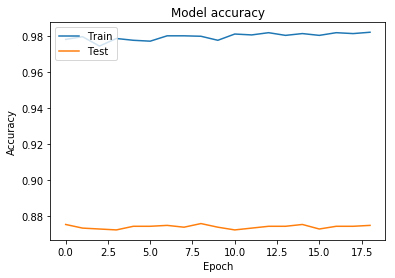

In [46]:
# Plot train vs test accuracy during training
plot_accuracy(history.history['acc'], history.history['val_acc'])

### Evaluate Predictions

In [13]:
# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Rounded Predictions: 
 [[1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 0.]
 ...
 [0. 0. 0.]
 [1. 1. 0.]
 [0. 1. 0.]]
660/660 [==============================] - 0s 21us/step
Accuracy: 0.8954545599041563


### Evaluate Different Activation Functions

In [73]:
#Function to create architecture

def get_model(act_function):
  model = Sequential()

  #Add in the hidden layer with activation
  if act_function == 'leaky_relu':
    model.add(Dense(64, input_shape=(20,)))
    model.add(LeakyReLU())
  else:
    model.add(Dense(64, input_shape=(20,), activation=act_function))
 
  #Output layer
  model.add(Dense(3, activation='sigmoid'))
    
  #Compile  
  model.compile(optimizer='adam', \
              loss='binary_crossentropy',\
              metrics=['accuracy'])
  return model

In [74]:
#Run model with different activations

# Set a seed
np.random.seed(27)

# Activation functions to try
activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']

# Loop over the activation functions
activation_results = {}

for act in activations:
  # Get a new model with the current activation
  model = get_model(act)
  # Fit the model
  history = model.fit(sensors_train, parcels_train,validation_data=(sensors_test, parcels_test),epochs=20,verbose=0)
  activation_results[act] = history

In [80]:
#Look at activation_results (example)
activation_results['leaky_relu'].history

{'acc': [0.7131841059940964,
  0.7937811214532425,
  0.8303482779816015,
  0.8465174360061759,
  0.8614428123431419,
  0.8651741511786162,
  0.8728855901689672,
  0.8738806165865998,
  0.8783582297723684,
  0.8783582292385955,
  0.8855721607137083,
  0.8855721564435247,
  0.8898010109787556,
  0.8915423081881965,
  0.8895522544633097,
  0.8932836020170752,
  0.8927860863173186,
  0.8965174301346737,
  0.9002487709273154,
  0.9034826095424481],
 'loss': [0.5908150985169767,
  0.43068790942875307,
  0.37154869108057736,
  0.33957065134795744,
  0.31843487389052094,
  0.3030939284545272,
  0.2944073782038333,
  0.287867756032232,
  0.2816014546511778,
  0.2749503419915242,
  0.2697383959346743,
  0.26587160407607235,
  0.2610096573829651,
  0.2582630190386701,
  0.2531526892042872,
  0.250086543186387,
  0.24483470267324306,
  0.2410741990181937,
  0.2378244871523843,
  0.23283340530609017],
 'val_acc': [0.7722222508806171,
  0.8181818463585594,
  0.8434343735376993,
  0.8590909343777281,

In [81]:
#Store val_loss and val_acc in dictionaries

#Create dictionaries for val_loss and val_acc
val_loss_per_function = {}
val_acc_per_function  = {}

#Store results for val_loss and val_act in dictionaries
for act in activations:
    val_loss_per_function[act] = activation_results[act].history['val_loss']
    val_acc_per_function[act]  = activation_results[act].history['val_acc']
    
#Review results
val_loss_per_function

{'leaky_relu': [0.46726631504116634,
  0.3915468723484964,
  0.3523150256185821,
  0.3324911700956749,
  0.31456279050220143,
  0.30558581948280333,
  0.2986743358048526,
  0.29783950014547866,
  0.2894098969119968,
  0.2859774511871916,
  0.28424858550230664,
  0.2792567363291076,
  0.280268852909406,
  0.27859961173751135,
  0.2701661043094866,
  0.26421871094992666,
  0.2613299675060041,
  0.2629159986069708,
  0.2568047700506268,
  0.2630488886977687],
 'relu': [0.45191956451444915,
  0.37181741577206234,
  0.33325489488514987,
  0.3100231372948849,
  0.296699061718854,
  0.28696950475374855,
  0.27970166414073017,
  0.27870142035412065,
  0.2761745635307196,
  0.2678105168270342,
  0.26337391092921747,
  0.2591833893096808,
  0.25796710939118356,
  0.25867490777463625,
  0.2532364666461945,
  0.2502924118981217,
  0.24942323953816384,
  0.2517255810174075,
  0.249323466871724,
  0.24383433163166046],
 'sigmoid': [0.5332314104744882,
  0.4807152746301709,
  0.43520640315431536,
  0

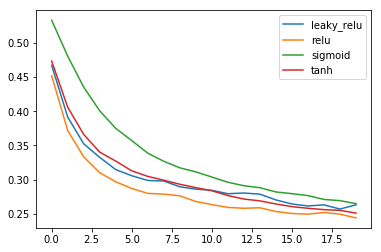

In [82]:
#Evaluate val_loss

# Create a dataframe from val_loss_per_function
val_loss= pd.DataFrame(val_loss_per_function)

# Call plot on the dataframe
val_loss.plot()
plt.show()


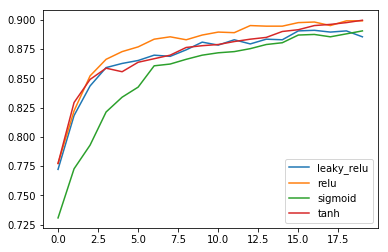

In [83]:
#Evaluate val_acc

# Create a dataframe from val_acc_per_function
val_acc = pd.DataFrame(val_acc_per_function)

# Call plot on the dataframe
val_acc.plot()
plt.show()